In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize']= 14, 8
RANDOM_SEED=42

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.shape

(284807, 31)

In [6]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#checking duplicates
data.duplicated().sum()

1081

In [8]:
data=data.drop_duplicates()

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [10]:
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [11]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

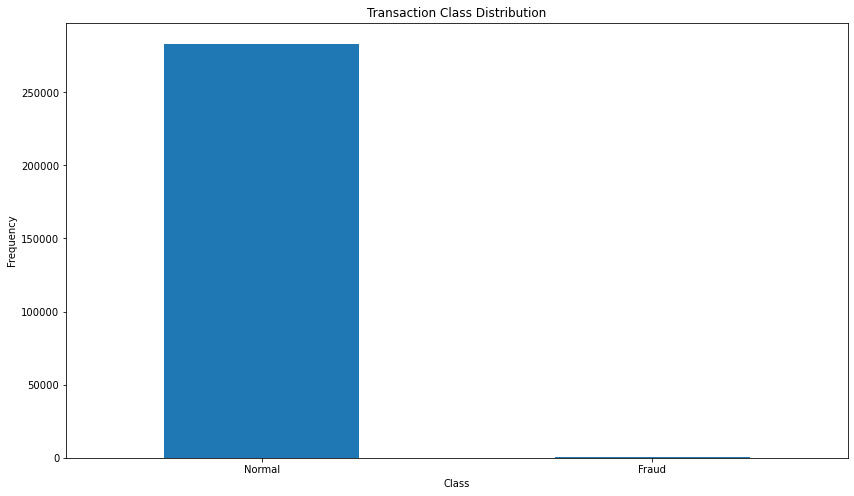

In [12]:
count_classes=pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
LABELS=["Normal","Fraud"]
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [13]:
#getting fraud and normal dataset

fraud=data[data['Class']==1]
normal=data[data['Class']==0]

In [14]:
fraud.shape, normal.shape

((473, 31), (283253, 31))

In [15]:
#we need to analyze more info from the trasaction data
#How different are the amount of money used in different transaction methods
fraud.Amount.describe().T

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
normal.Amount.describe().T

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

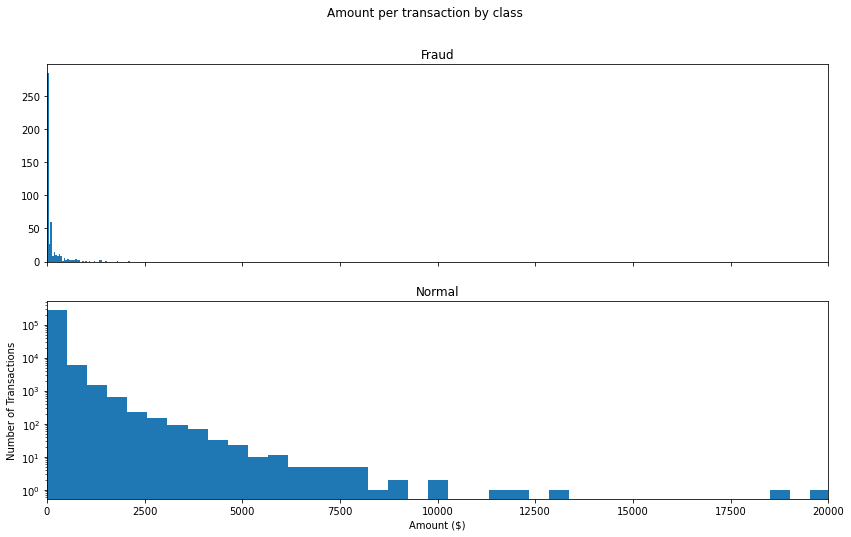

In [17]:
f, (ax1,ax2)=plt.subplots(2,1, sharex=True)
f.suptitle('Amount per transaction by class')
bins=50
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show();

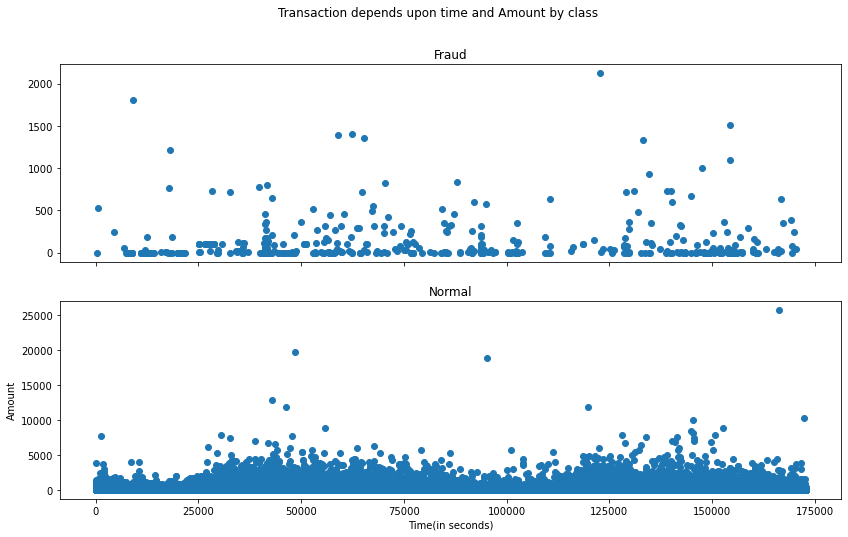

In [18]:
f, (ax1,ax2)=plt.subplots(2,1, sharex=True)
f.suptitle('Transaction depends upon time and Amount by class')
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time(in seconds)')
plt.ylabel('Amount')
plt.show();

In [19]:
data1=data.sample(frac=0.1,random_state=1)
data1.shape

(28373, 31)

In [20]:
data.shape

(283726, 31)

In [21]:
#getting fraud and normal dataset from sample dataset
fraud=data1[data1['Class']==1]
normal=data1[data1['Class']==0]

In [22]:
fraud.shape,normal.shape

((40, 31), (28333, 31))

In [23]:
outlier_fraction=len(fraud)/float(len(normal))

In [24]:
print(outlier_fraction)
print("Fraud cases:{}".format(len(fraud)))
print("normal cases:{}".format(len(normal)))

0.001411781315074295
Fraud cases:40
normal cases:28333


<AxesSubplot:>

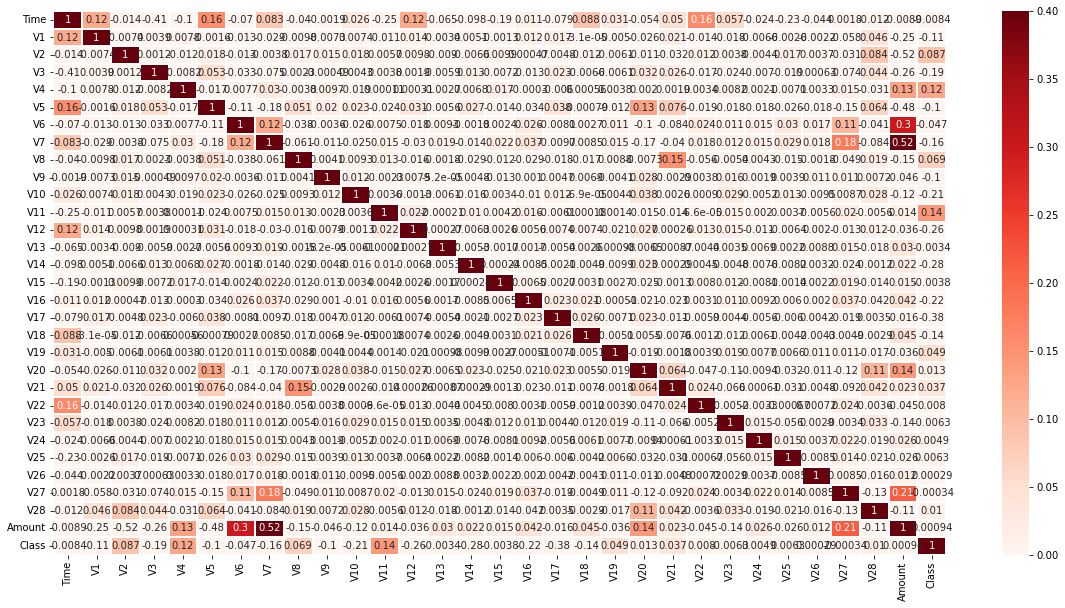

In [25]:
#Finding correlation
corr=data1.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr,vmin=-0,vmax=0.4,annot=True,linewidth=0.2,cmap='Reds')

In [26]:
#splitting of dataset
x=data1.drop(['Class'],axis=1)
y=data1['Class']

In [27]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
33560,37283.0,-1.071719,-4.343904,-0.497727,-0.277591,-2.482346,-0.472073,0.991747,-0.414207,1.694252,...,2.433118,0.856441,0.013647,-1.183439,0.536058,0.064148,-0.016945,-0.179133,0.236036,1217.00
57869,48115.0,1.314915,-0.980378,-0.032665,-2.770975,-1.047365,-0.705180,-0.491240,-0.076395,0.571959,...,-0.475477,-0.416346,-0.481886,-0.009117,0.009622,0.555844,-0.836622,0.099256,0.014826,26.31
187479,127554.0,-1.680526,-0.959150,-1.329705,-1.028361,-0.730922,0.253124,3.308312,-0.480062,0.157630,...,-0.030472,-0.084593,-0.204108,0.517400,-0.611013,-0.445912,-0.409744,0.231809,0.253554,680.91
243555,151975.0,2.114488,0.169976,-2.051966,0.070326,0.481642,-1.819440,0.886700,-0.673729,0.077960,...,-0.174444,0.163748,0.642597,-0.058720,0.128632,0.461792,0.234073,-0.082360,-0.075323,12.92
96229,65675.0,-5.277692,3.487837,-1.201844,-0.192904,-0.158582,0.949549,0.467901,-0.788434,4.652615,...,2.080629,-0.477313,-1.077669,0.160074,-1.535126,0.873245,-0.322503,1.383375,0.758996,28.90


In [28]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [29]:
print(x.shape)
print(y.shape)

(28373, 30)
(28373,)


# Model Predction

Its time to start building the model..The types of algorithms we are going to use to try to do 
anomaly detection on this dataset are Isolation Forest Algorithm and Local Outlier Factor(LOF) Algorithm. Because both of the algorithams will be better with imbalanced dataset.

In [30]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(x), 
                                       contamination=outlier_fraction, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    
   
}

In [31]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(x)
        scores_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y,y_pred))
    print("Classification Report :")
    print(classification_report(y,y_pred))

C:\Users\nivin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 53
Accuracy Score :
0.9981320269270081
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28333
           1       0.34      0.35      0.35        40

    accuracy                           1.00     28373
   macro avg       0.67      0.67      0.67     28373
weighted avg       1.00      1.00      1.00     28373

Local Outlier Factor: 81
Accuracy Score :
0.997145173228069
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28333
           1       0.00      0.00      0.00        40

    accuracy                           1.00     28373
   macro avg       0.50      0.50      0.50     28373
weighted avg       1.00      1.00      1.00     28373



# Observations

•Isolation Forest detected 53 errors versus Local Outlier Factor detecting 81 errors.
•Isolation Forest has a 99.81% more accurate than LOF of 99.71%.
•When comparing error precision & recall for 2 models , the Isolation Forest performed much better than the LOF as we can 
 see that the detection of fraud cases is around 27 % versus LOF detection rate of just 2 %.
•So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.